# Compute Techiness for each cluster (community)

In [1]:
import pandas as pd
import pickle

# Load Data
with open(file = 'ques_df.pickle', mode = 'rb') as file:
    ques_df = pickle.load(file)
with open(file = 'ans_df.pickle', mode = 'rb') as file:
    ans_df = pickle.load(file)

### 1) Calculate Code Ratio in the Body Texts (code_body / full_body)

In [2]:
ques_df['techiness'] = ques_df['code_body'].apply(len) / ques_df['full_body'].apply(len)

In [3]:
def extract_code_blocks(raw_html):
    soup = BeautifulSoup(raw_html, "html.parser")
    code_blocks = soup.find_all(['code', 'pre'])
    code_texts = list(set([block.get_text() for block in code_blocks]))
    return "\n".join(code_texts)

In [132]:
from bs4 import BeautifulSoup
target = ques_df['body'][5]
soup = BeautifulSoup(target, "html.parser")
soup

<p>I don't know why, but why the code below does not have the expected behavior?</p>
<pre><code>let workspace = NSWorkspace.shared
if let bundleURL = workspace.urlForApplication(withBundleIdentifier: "com.apple.Safari"){
   workspace.open(bundleURL)
   let conf = NSWorkspace.OpenConfiguration()
   conf.activates = false
   conf.hides = true
   workspace.openApplication(at: bundleURL, configuration: conf){ (app, err) in
       print(app as Any)
       print(err as Any)
   }
}
</code></pre>
<p>When I run the code, the Safari application is opening normally, neither “Hides” is working nor “Activates” false is working.</p>
<p>Obs: App Sandboxed: NO | Deployment Target: 11.3 | Xcode: 12.5.1</p>

In [124]:
ques_df.head(7)

,id,creation_date,body,tags,community,full_body,code_body,techiness
0,69006423,2021-09-01 00:00:35.237,<p>Using interceptors for the first time to re...,"[nodeDOTjs, reactjs, express, axios, refreshto...",0,Using interceptors for the first time to refre...,,0.000000
1,69006426,2021-09-01 00:00:55.583,"<p>The APP below uses <code>navbarPage</code>,...","[r, shiny]",1,"The APP below uses navbarPage, however I will ...",dashboardPage\nlibrary(shiny)\nlibrary(shinyth...,0.925080
2,69006431,2021-09-01 00:01:23.670,<p>I am developing a java project and every th...,"[java, installation, compilation, project, ope...",2,I am developing a java project and every thing...,,0.000000
3,69006437,2021-09-01 00:03:18.750,"<p>As you know, all firebase hosting is provid...","[firebase, nuxtDOTjs, firebasehosting]",14,"As you know, all firebase hosting is provided ...",const ignorePaths = <%= serialize(options.igno...,0.536106
4,69006439,2021-09-01 00:03:36.930,<p>I am trying to split the string as below</p...,"[r, dataDOTtable]",1,I am trying to split the string as below\nx <-...,"x <- data.table(VAROLD=c('DBA','ADB'))\nx[, pa...",0.290503
5,69006440,2021-09-01 00:03:38.323,"<p>I don't know why, but why the code below do...",[swift],14,"I don't know why, but why the code below does ...",let workspace = NSWorkspace.shared\nif let bun...,0.587156
6,69006444,2021-09-01 00:04:08.040,<p>Hi I am a begginer and i have a problem wit...,"[python, discordDOTpy, texttospeech]",1,Hi I am a begginer and i have a problem with m...,"@bot.command()\nasync def tts(ctx,*, text:str)...",0.613165


In [5]:
agg_df = ques_df.groupby('community')['techiness'].mean().reset_index()

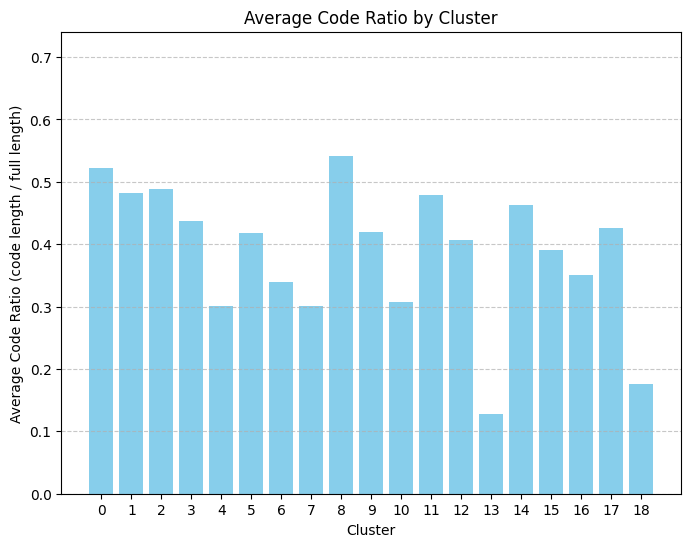

In [6]:
# Plot the clustered average ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(agg_df['community'].astype(str), agg_df['techiness'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Average Code Ratio (code length / full length)')
plt.title('Average Code Ratio by Cluster')
plt.ylim(0, max(agg_df['techiness']) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2) Aggregate average daily code ratio for each cluster
- only use Questions
- use both Questions and Answers

### - Questions Only

In [4]:
ques_df['creation_date'] = pd.to_datetime(ques_df['creation_date'])
ques_df['year_month_day'] = ques_df['creation_date'].dt.to_period('D') # daily
ques_df['year_month'] = ques_df['creation_date'].dt.to_period('M') # monthly

In [11]:
# Daily Aggregation
agg_q = ques_df.groupby(['year_month_day', 'community'])['techiness'].mean().reset_index()
agg_q['year_month_day'] = agg_q['year_month_day'].astype(str)
agg_q

,year_month_day,community,techiness
0,2021-09-01,0,0.536302
1,2021-09-01,1,0.501870
2,2021-09-01,2,0.505780
3,2021-09-01,3,0.431262
4,2021-09-01,5,0.450955
...,...,...,...
11575,2023-08-31,12,0.342578
11576,2023-08-31,14,0.388392
11577,2023-08-31,16,0.322072
11578,2023-08-31,17,0.402944


In [96]:
agg_q[(agg_q['year_month_day']=='2021-09-01') & (agg_q['community'] == 4)] # 해당 일에 post가 없는 communitysms omit 됨.

,year_month_day,community,techiness


In [12]:
# Monthly Aggregation
agg_q_monthly = ques_df.groupby(['year_month', 'community'])['techiness'].mean().reset_index()
agg_q_monthly['year_month'] = agg_q_monthly['year_month'].astype(str)
agg_q_monthly

,year_month,community,techiness
0,2021-09,0,0.538229
1,2021-09,1,0.486972
2,2021-09,2,0.494683
3,2021-09,3,0.442400
4,2021-09,4,0.263779
...,...,...,...
421,2023-08,12,0.418633
422,2023-08,14,0.426959
423,2023-08,16,0.286810
424,2023-08,17,0.424191


### 3) Create DiD Table

In [13]:
# Load pre-computed did tables
post = pd.read_csv("/data1/StackOverflow/diff_in_diff/numPosts_did.csv")
entropy = pd.read_csv('/data1/StackOverflow/_Robustness/entropy_did.csv')
lsm = pd.read_csv('/data1/StackOverflow/diff_in_diff/lsm_did2_modified.csv')
import numpy as np
entropy.columns = ['year_month_day', 'score']
entropy['ln_entropy'] = np.log(entropy['score'])
entropy

# Merge post and hhi data.
post['ln_entropy'] = entropy['ln_entropy']
post = post.drop(['count_q', 'count_a'], axis=1)
post.head()

,year_month_day,T_d,P_t,ln_q,ln_a,month,ln_entropy
0,2021-09-01,0,0,8.468003,8.745921,9,5.701463
1,2021-09-02,0,0,8.488588,8.767641,9,5.693322
2,2021-09-03,0,0,8.329658,8.616858,9,5.708169
3,2021-09-04,0,0,7.806289,8.088562,9,5.537817
4,2021-09-05,0,0,7.802209,8.125631,9,5.537641


In [14]:
did_table1 = pd.merge(agg_q, post, how = 'left', on = 'year_month_day')
did_table1

,year_month_day,community,techiness,T_d,P_t,ln_q,ln_a,month,ln_entropy
0,2021-09-01,0,0.536302,0,0,8.468003,8.745921,9,5.701463
1,2021-09-01,1,0.501870,0,0,8.468003,8.745921,9,5.701463
2,2021-09-01,2,0.505780,0,0,8.468003,8.745921,9,5.701463
3,2021-09-01,3,0.431262,0,0,8.468003,8.745921,9,5.701463
4,2021-09-01,5,0.450955,0,0,8.468003,8.745921,9,5.701463
...,...,...,...,...,...,...,...,...,...
11575,2023-08-31,12,0.342578,1,1,8.209036,8.050384,8,5.829741
11576,2023-08-31,14,0.388392,1,1,8.209036,8.050384,8,5.829741
11577,2023-08-31,16,0.322072,1,1,8.209036,8.050384,8,5.829741
11578,2023-08-31,17,0.402944,1,1,8.209036,8.050384,8,5.829741


In [98]:
155*426 # 426 records의 기록을 155명의 유저 만큼 늘리면 66,030개.

66030

In [111]:
# LSM: needs to aggregate techiness based on monthly aggregation
did_table2 = pd.merge(agg_q_monthly, lsm, how = 'outer', on = 'year_month')
did_table2 = did_table2.drop('Similarity_toAvg', axis = 1)
did_table2

,year_month,community,techiness,User,T_d,P_t,ln_y
0,2021-09,0,0.538229,248823,0,0,-1.759955
1,2021-09,0,0.538229,12634230,0,0,-1.732590
2,2021-09,0,0.538229,3440745,0,0,-1.713425
3,2021-09,0,0.538229,775806,0,0,-1.741289
4,2021-09,0,0.538229,65863,0,0,-1.787383
...,...,...,...,...,...,...,...
66025,2023-08,18,0.131019,9450991,1,1,-1.683162
66026,2023-08,18,0.131019,584518,1,1,-1.657693
66027,2023-08,18,0.131019,10157127,1,1,-1.692236
66028,2023-08,18,0.131019,939557,1,1,-1.584994


### 4) DiD Analysis

In [135]:
# DiD Result (Entropy)
sm.ols('ln_entropy ~ T_d + P_t + techiness + T_d * P_t * techiness + C(month) + C(community)', did_table1).fit(cov_type = 'HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_entropy   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:50:57   Log-Likelihood:                 15385.
No. Observations:               11580   AIC:                        -3.070e+04
Df Residuals:                   11543   BIC:                        -3.042e+04
Df Model:                          36                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.6709      0.008    713.532      0.000       5.655       5.686
C(month)[T.2]          0.0152      0.003      5.334      0.000       0.010       0.021
C(month)[T.3]          0.0149      0.003      5.267      0.000       0.009       0.020
C(month)[T.4]         -0.0046      0.003     -1.510      0.131      -0.010       0.001
C(month)[T.5]         -0.0010      0.003     -0.335      0.738      -0.007       0.005
C(month)[T.6]          0.0069      0.003      2.328      0.020       0.001       0.013
C(month)[T.7]         -0.0038      0.003     -1.246      0.213      -0.010       0.002
C(month)[T.8]          0.0115      0.003      3.966      0.000       0.006       0.017
C(month)[T.9]          0.0193      0.004      4.361      0.000       0.011       0.028
C(month)[T.10]         0.0141      0.004      3.149      0.002       0.005       0.023
C(month)[T.11]         0.0364      0.003     10.582      0.000       0.030       0.043
C(month)[T.12]        -0.0192      0.003     -6.742      0.000      -0.025      -0.014
C(community)[T.1]     -0.0029      0.003     -0.850      0.395      -0.010       0.004
C(community)[T.2]     -0.0022      0.003     -0.660      0.509      -0.009       0.004
C(community)[T.3]     -0.0061      0.003     -1.775      0.076      -0.013       0.001
C(community)[T.4]      0.0032      0.005      0.607      0.544      -0.007       0.014
C(community)[T.5]     -0.0074      0.003     -2.132      0.033      -0.014      -0.001
C(community)[T.6]     -0.0129      0.004     -3.570      0.000      -0.020      -0.006
C(community)[T.7]     -0.0158      0.004     -4.268      0.000      -0.023      -0.009
C(community)[T.8]      0.0011      0.003      0.325      0.745      -0.006       0.008
C(community)[T.9]     -0.0071      0.003     -2.055      0.040      -0.014      -0.000
C(community)[T.10]    -0.0102      0.004     -2.807      0.005      -0.017      -0.003
C(community)[T.11]    -0.0032      0.003     -0.918      0.358      -0.010       0.004
C(community)[T.12]    -0.0080      0.004     -2.292      0.022      -0.015      -0.001
C(community)[T.13]     0.0164      0.008      1.935      0.053      -0.000       0.033
C(community)[T.14]    -0.0042      0.003     -1.212      0.226      -0.011       0.003
C(community)[T.15]    -0.0030      0.046     -0.065      0.948      -0.092       0.086
C(community)[T.16]    -0.0089      0.004     -2.512      0.012      -0.016      -0.002
C(community)[T.17]    -0.0070      0.003     -2.020      0.043      -0.014      -0.000
C(community)[T.18]     0.0006      0.004      0.150      0.881      -0.007       0.008
T_d                    0.0754      0.008      9.192      0.000       0.059       0.092
P_t                    0.0315      0.007      4.226      0.000       0.017       0.046
techiness             -0.0551      0.0

In [136]:
# DiD Result (Questions)
sm.ols('ln_q ~ T_d + P_t + techiness + T_d * P_t * techiness + C(month) + C(community)', did_table1).fit(cov_type = 'HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ln_q   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     80.71
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:00:32   Log-Likelihood:                -1508.5
No. Observations:               11580   AIC:                             3091.
Df Residuals:                   11543   BIC:                             3363.
Df Model:                          36                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.1438      0.043    188.304      0.000       8.059       8.229
C(month)[T.2]          0.0290      0.013      2.271      0.023       0.004       0.054
C(month)[T.3]         -0.0230      0.012     -1.872      0.061      -0.047       0.001
C(month)[T.4]         -0.1396      0.013    -11.005      0.000      -0.164      -0.115
C(month)[T.5]         -0.1720      0.013    -13.618      0.000      -0.197      -0.147
C(month)[T.6]         -0.1811      0.013    -13.938      0.000      -0.207      -0.156
C(month)[T.7]         -0.2265      0.013    -16.956      0.000      -0.253      -0.200
C(month)[T.8]         -0.1774      0.013    -14.021      0.000      -0.202      -0.153
C(month)[T.9]          0.2299      0.034      6.756      0.000       0.163       0.297
C(month)[T.10]         0.2119      0.034      6.215      0.000       0.145       0.279
C(month)[T.11]         0.2676      0.032      8.371      0.000       0.205       0.330
C(month)[T.12]        -0.0362      0.013     -2.691      0.007      -0.063      -0.010
C(community)[T.1]     -0.0122      0.015     -0.829      0.407      -0.041       0.017
C(community)[T.2]     -0.0094      0.015     -0.643      0.520      -0.038       0.019
C(community)[T.3]     -0.0257      0.015     -1.734      0.083      -0.055       0.003
C(community)[T.4]      0.0140      0.023      0.614      0.539      -0.031       0.059
C(community)[T.5]     -0.0311      0.015     -2.083      0.037      -0.060      -0.002
C(community)[T.6]     -0.0542      0.016     -3.488      0.000      -0.085      -0.024
C(community)[T.7]     -0.0665      0.016     -4.179      0.000      -0.098      -0.035
C(community)[T.8]      0.0046      0.015      0.317      0.752      -0.024       0.033
C(community)[T.9]     -0.0299      0.015     -2.006      0.045      -0.059      -0.001
C(community)[T.10]    -0.0431      0.016     -2.777      0.005      -0.073      -0.013
C(community)[T.11]    -0.0132      0.015     -0.895      0.371      -0.042       0.016
C(community)[T.12]    -0.0336      0.015     -2.238      0.025      -0.063      -0.004
C(community)[T.13]     0.0702      0.027      2.572      0.010       0.017       0.124
C(community)[T.14]    -0.0174      0.015     -1.183      0.237      -0.046       0.011
C(community)[T.15]     0.0166      0.235      0.070      0.944      -0.445       0.478
C(community)[T.16]    -0.0371      0.015     -2.424      0.015      -0.067      -0.007
C(community)[T.17]    -0.0294      0.015     -1.974      0.048      -0.059      -0.000
C(community)[T.18]     0.0053      0.017      0.309      0.757      -0.029       0.039
T_d                    0.1427      0.034      4.222      0.000       0.076       0.209
P_t                    0.3384      0.042      8.146      0.000       0.257       0.420
techiness             -0.2237      0.0

In [137]:
# DiD Result (Answers)
sm.ols('ln_a ~ T_d + P_t + techiness + T_d * P_t * techiness + C(month) + C(community)', did_table1).fit(cov_type = 'HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ln_a   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     211.3
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:03:05   Log-Likelihood:                -1074.8
No. Observations:               11580   AIC:                             2224.
Df Residuals:                   11543   BIC:                             2496.
Df Model:                          36                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.4163      0.044    192.343      0.000       8.331       8.502
C(month)[T.2]          0.0052      0.012      0.427      0.669      -0.019       0.029
C(month)[T.3]         -0.0574      0.012     -4.823      0.000      -0.081      -0.034
C(month)[T.4]         -0.1807      0.012    -14.850      0.000      -0.205      -0.157
C(month)[T.5]         -0.2093      0.012    -17.210      0.000      -0.233      -0.185
C(month)[T.6]         -0.2219      0.013    -17.648      0.000      -0.247      -0.197
C(month)[T.7]         -0.2510      0.013    -19.713      0.000      -0.276      -0.226
C(month)[T.8]         -0.2396      0.012    -19.277      0.000      -0.264      -0.215
C(month)[T.9]          0.2404      0.035      6.780      0.000       0.171       0.310
C(month)[T.10]         0.1904      0.036      5.360      0.000       0.121       0.260
C(month)[T.11]         0.2151      0.034      6.388      0.000       0.149       0.281
C(month)[T.12]        -0.0462      0.013     -3.558      0.000      -0.072      -0.021
C(community)[T.1]     -0.0116      0.014     -0.816      0.414      -0.039       0.016
C(community)[T.2]     -0.0089      0.014     -0.632      0.527      -0.037       0.019
C(community)[T.3]     -0.0243      0.014     -1.702      0.089      -0.052       0.004
C(community)[T.4]      0.0124      0.022      0.563      0.573      -0.031       0.055
C(community)[T.5]     -0.0294      0.014     -2.044      0.041      -0.057      -0.001
C(community)[T.6]     -0.0513      0.015     -3.428      0.001      -0.081      -0.022
C(community)[T.7]     -0.0628      0.015     -4.101      0.000      -0.093      -0.033
C(community)[T.8]      0.0044      0.014      0.312      0.755      -0.023       0.032
C(community)[T.9]     -0.0283      0.014     -1.970      0.049      -0.056      -0.000
C(community)[T.10]    -0.0410      0.015     -2.739      0.006      -0.070      -0.012
C(community)[T.11]    -0.0126      0.014     -0.884      0.376      -0.040       0.015
C(community)[T.12]    -0.0320      0.014     -2.211      0.027      -0.060      -0.004
C(community)[T.13]     0.0596      0.026      2.275      0.023       0.008       0.111
C(community)[T.14]    -0.0165      0.014     -1.161      0.246      -0.044       0.011
C(community)[T.15]     0.0184      0.224      0.082      0.935      -0.421       0.458
C(community)[T.16]    -0.0350      0.015     -2.374      0.018      -0.064      -0.006
C(community)[T.17]    -0.0278      0.014     -1.938      0.053      -0.056       0.000
C(community)[T.18]     0.0054      0.017      0.327      0.743      -0.027       0.038
T_d                   -0.0713      0.032     -2.229      0.026      -0.134      -0.009
P_t                    0.3336      0.042      7.891      0.000       0.251       0.416
techiness             -0.2151      0.0

In [138]:
# DiD Result (LSM)
sm.ols('ln_y ~ T_d + P_t + techiness + T_d * P_t * techiness + C(User) + C(community)', did_table2).fit(cov_type = 'HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ln_y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     2018.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:05:12   Log-Likelihood:                 67924.
No. Observations:               66030   AIC:                        -1.355e+05
Df Residuals:                   65850   BIC:                        -1.339e+05
Df Model:                         179                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.7734      0.005   -344.807      0.000      -1.783      -1.763
C(User)[T.6309]         0.0051      0.001      5.986      0.000       0.003       0.007
C(User)[T.7552]         0.0207      0.005      4.437      0.000       0.012       0.030
C(User)[T.13070]        0.1257      0.002     82.108      0.000       0.123       0.129
C(User)[T.14104]        0.0448      0.001     34.987      0.000       0.042       0.047
C(User)[T.14860]        0.1088      0.005     20.561      0.000       0.098       0.119
C(User)[T.16007]        0.1238      0.004     28.023      0.000       0.115       0.132
C(User)[T.16406]        0.1638      0.002     96.909      0.000       0.160       0.167
C(User)[T.16582]        0.0819      0.006     14.189      0.000       0.071       0.093
C(User)[T.62076]        0.0214      0.001     16.434      0.000       0.019       0.024
C(User)[T.65863]       -0.0154      0.001    -15.139      0.000      -0.017      -0.013
C(User)[T.108205]       0.1368      0.001    117.200      0.000       0.135       0.139
C(User)[T.125981]       0.0597      0.002     29.995      0.000       0.056       0.064
C(User)[T.126014]       0.1078      0.006     17.897      0.000       0.096       0.120
C(User)[T.128165]       0.0188      0.004      4.278      0.000       0.010       0.027
C(User)[T.134204]      -0.0061      0.001     -6.114      0.000      -0.008      -0.004
C(User)[T.143305]       0.0075      0.001      5.636      0.000       0.005       0.010
C(User)[T.143475]       0.0276      0.001     24.043      0.000       0.025       0.030
C(User)[T.152948]       0.1714      0.005     33.375      0.000       0.161       0.181
C(User)[T.181965]       0.0647      0.002     27.970      0.000       0.060       0.069
C(User)[T.188096]       0.0308      0.002     17.640      0.000       0.027       0.034
C(User)[T.209103]       0.0923      0.001     88.570      0.000       0.090       0.094
C(User)[T.212378]       0.1408      0.004     38.314      0.000       0.134       0.148
C(User)[T.236465]       0.0106      0.001      7.301      0.000       0.008       0.013
C(User)[T.248823]       0.0028      0.001      2.705      0.007       0.001       0.005
C(User)[T.271415]       0.0125      0.002      8.266      0.000       0.010       0.015
C(User)[T.295783]       0.1000      0.002     56.581      0.000       0.097       0.104
C(User)[T.315168]       0.0477      0.002     21.660      0.000       0.043       0.052
C(User)[T.362536]       0.1962      0.007     28.936      0.000       0.183       0.210
C(User)[T.383904]       0.0664      0.004     15.759      0.000       0.058       0.075
C(User)[T.415448]       0.1061      0.002     68.152      0.000       0.103       0.109
C(User)[T.438273]      -0.0013      0.001     -1.342      0.180      -0.003       0.001
C(U